# Kinetic theory of gases

At the foundations of statistical mechanics is the study of gases.

In the *kinetic theory of gases*, gases are constituted of **particles**. They have the folowing properties:

- the particles are much smaller than the volume occupied by the gas.
- the partices the same mass
- the number of particles is large (>>1)
- the particles collide elastically (no energy loss)

Under such assumptions, it can be shown that the distribution of particle velocities obeys , at equilibriuum, the **Maxwell-Bolltzmann** distribution
$$
p(v)  = \left(\dfrac{m}{2\pi k_BT}\right)^{3/2} \exp\left[\dfrac{-mv^2}{2k_B T}\right]
$$

## Goal

Our aim is to *simulate* a gas employing the physical assumptions above and **verify** that eventually the distribution fo velocities converges to teh Maxwell-Bolltzmann distribution.


To do so, we need to break down the problem into smaller components. 

1. We need to choose how to represent the particles.
1. We need to determine how to evolve positions and velocities.
1. We need to decide how to implement the collisions.
1. We need to choose how to confine the particles in a box.
1. We need to run the simulation and 'equilibrate' it.
1. We need to sample the velocity distribution and compare wih the theory.


## Representing particles

In molecular dynamics, we focus on the evolution particles positions $\vec{r}$ and velocities $\vec{v}$.

Here we want to simulate a 2d gas of particles within a box od size $L$, where the particles are only subject to elastic collisions.

Discuss in your group what characteristics define a particle. Think of a possible implementation.

```
    pseudocode

```



### Plotting

Plot the particles in 2d using `matplotlib`. Explore the animation possibilities based on the following example:

<IPython.core.display.Javascript object>


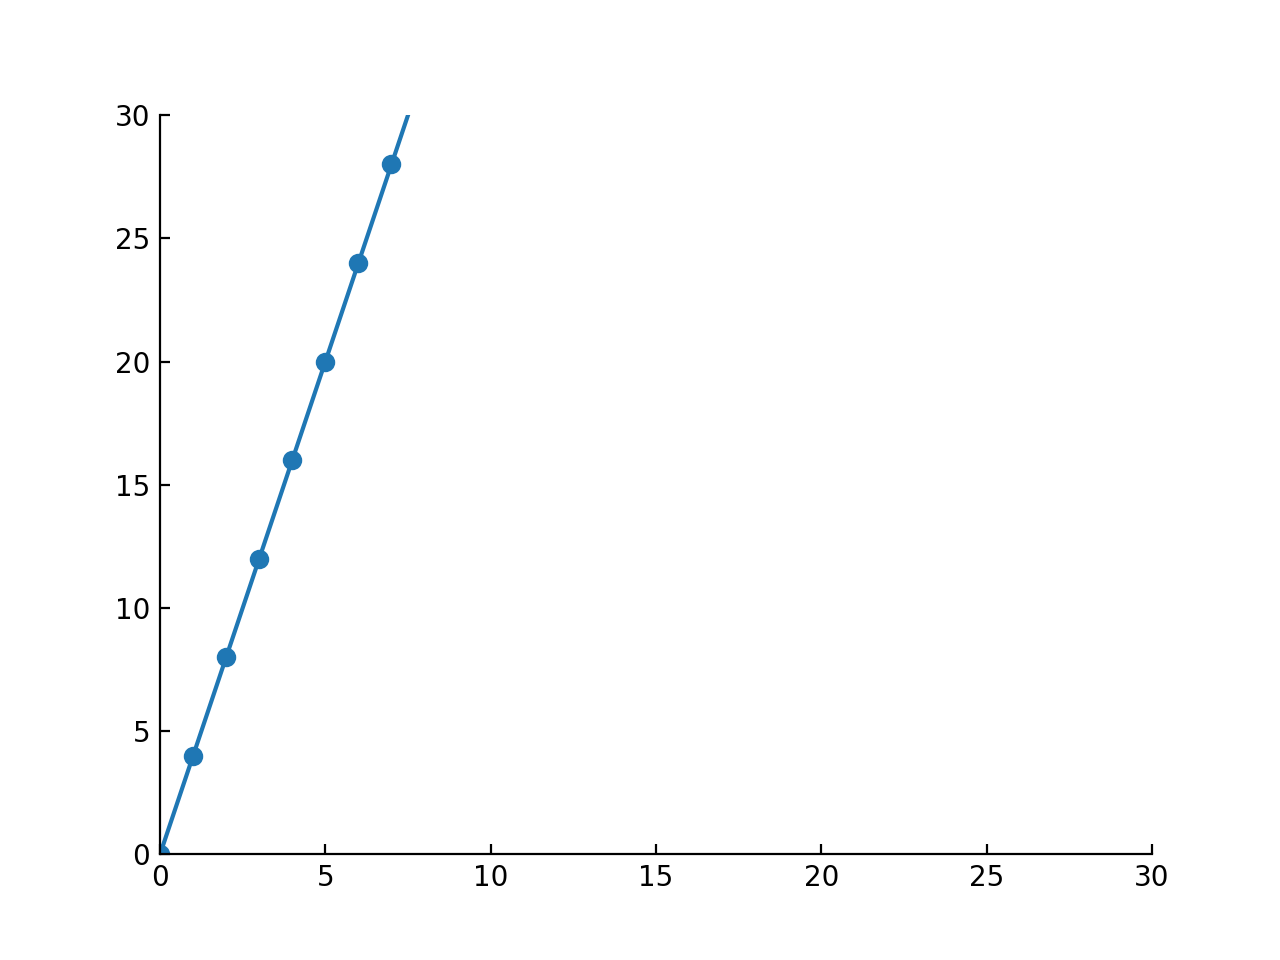

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np


fig,ax= plt.subplots()
N = 10

x = np.arange(N)
y = np.arange(N)
pts, = ax.plot(x,y,'-o')

def animate(i):
    y = x*i
    pts.set_data(x,y)
    plt.xlim(0,30)
    plt.ylim(0,30)
    return pts
steps = np.arange(5)
anim = animation.FuncAnimation(fig, animate,frames=steps,  interval=1)

plt.show()

## Equations of motion

The gas particles are non-interacting, excepting during the collisions. 

This means that their motion is uniform between collisions.

**Q1:** What does this imply for their velocity during the collisions?

**Q2** Can you write down an equation for the position of a particle between collisions?

## Elastic collisions

Let us consider two identical spherical particles of mass $m$ and diameter $d$ colliding with velocities $v_1$ and $v_2$.

The collisions are **elastic** which means that the total kinetic energy, the momentum and the angular momentum are **conserved**. 

$$\frac{1}{2}mv_1^2+\frac{1}{2}mv_2^2=\frac{1}{2}m{v'}_1^2+\frac{1}{2}m{v'}_2^2$$

$$m\vec{v}_1+m\vec{v_2}= m\vec{v'}_1+m\vec{v'}_2$$
where the $v'$  are the velocities after the collision. 

The collision occurs when the centres are at distance $|\vec{r}_1-\vec{r}_2| = d$.


The impulse for each particle is


$$\vec{J}_1 =  \vec{p}_1'-\vec{p}_1 $$

$$\vec{J}_2 =  \vec{p}_2'-\vec{p}_2$$

And conservation of momentum implies

$$ \vec{J}_1+\vec{J}_2 = \vec{p}_1'-\vec{p}_1 +\vec{p}_2'-\vec{p}_2 =0$$

The force at the collision point is along the radii of the two spheres, so the impulse is parallel to the vector $\Delta \vec{r}=\vec{r}_1-\vec{r}_2$. Call

$$\hat{n} = \frac{\vec{r}_1-\vec{r}_2}{d}$$

So $$\vec{J}=\vec{J_1}=-\vec{J}_2 = \lambda \hat{n}$$

with $\lambda$ a scalar to be determined. From the definitions of the impulses we have

$$\vec{v}_1' = \vec{v}_1+\frac{\lambda}{m_1}\hat{n}$$
$$\vec{v}_2' = \vec{v}_2+\frac{\lambda}{m_2}\hat{n}$$

We now impose the conservation of kinetic energy.

**Show** that this means that 

$$ \lambda^2 \frac{m_1+m_2}{m_1 m_2}+2\lambda \hat{n}\cdot{(\vec{v_1}-\vec{v}_2)}=0$$

The only nontrivial solution is 
$$\lambda = -2 \frac{m_1 m_2}{m_1+m_2}\hat{n}\cdot{(\vec{v_1}-\vec{v}_2)}$$

and the final result is 


$$\vec{v}_1' = \vec{v}_1-\frac{2 m_2\hat{n}\cdot{(\vec{v_1}-\vec{v}_2)}}{m_1+m_2}\hat{n}$$
$$\vec{v}_2' = \vec{v}_2-\frac{2 m_1\hat{n}\cdot{(\vec{v_1}-\vec{v}_2)}}{m_1+m_2}\hat{n}$$

**Exercise**

Implement a function `collision` that (given the psitions and velocities of two particles), implements the collision rules derived above.